In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression


df_listing = pd.read_csv("../../raw_data/sfo/listings-1.csv")
df_transit = pd.read_csv("data/sfo_distance.csv")

In [2]:
df_transit

,id,distance,duration
0,958,14,3
1,5858,366,91
2,7918,45,8
3,8142,45,8
4,8339,102,27
...,...,...,...
6835,42973015,22,4
6836,42982252,193,56
6837,42989740,266,46
6838,42990899,585,140


In [3]:
df_listing["price"]

0       $132.00
1       $235.00
2        $56.00
3        $56.00
4       $750.00
         ...   
7269     $71.00
7270     $62.00
7271    $399.00
7272    $120.00
7273    $120.00
Name: price, Length: 7274, dtype: object

In [4]:
df = pd.merge(df_transit, df_listing, on="id")
df

,id,distance,duration,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,14,3,https://www.airbnb.com/rooms/958,20200815122856,2020-08-15,"Bright, Modern Garden Unit - 1BR/1BTH",Cleaning Protocol: Our cleaners follow the Air...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,...,10.0,10.0,10.0,STR-0001256,f,1,1,0,0,1.91
1,5858,366,91,https://www.airbnb.com/rooms/5858,20200815122856,2020-08-15,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,...,10.0,10.0,9.0,NaN,f,1,1,0,0,0.81
2,7918,45,8,https://www.airbnb.com/rooms/7918,20200815122856,2020-08-15,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",https://a0.muscache.com/pictures/26356/8030652...,...,9.0,9.0,8.0,NaN,f,9,0,9,0,0.14
3,8142,45,8,https://www.airbnb.com/rooms/8142,20200815122856,2020-08-15,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,NaN,https://a0.muscache.com/pictures/27832/3b1f9e5...,...,10.0,9.0,9.0,NaN,f,9,0,9,0,0.11
4,8339,102,27,https://www.airbnb.com/rooms/8339,20200815122856,2020-08-15,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/213fbf05-3545...,...,10.0,10.0,10.0,STR-0000264,f,2,2,0,0,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,42973015,22,4,https://www.airbnb.com/rooms/42973015,20200815122856,2020-08-15,3 Bedroom Two Level City View Condo with Hot Tub,This is the 3 bedroom 2.5 bath (with jetted ho...,If you are interested in exploring the neighbo...,https://a0.muscache.com/pictures/4dfde0ad-9a83...,...,NaN,NaN,NaN,NaN,t,4,4,0,0,NaN
6836,42982252,193,56,https://www.airbnb.com/rooms/42982252,20200815122856,2020-08-15,The Oasis: Gorgeous Room in Beautiful Home!,"Huge, light filled, freshly remodeled room wit...","Quiet, residential block just a short walk fro...",https://a0.muscache.com/pictures/60b6378c-25cf...,...,10.0,10.0,10.0,NaN,f,10,6,4,0,0.55
6837,42989740,266,46,https://www.airbnb.com/rooms/42989740,20200815122856,2020-08-15,Private Modern Unit w/Private Hot Tub & Patio+...,"- Property has always been sparkling clean, bu...",NaN,https://a0.muscache.com/pictures/e40b5892-3d5a...,...,10.0,10.0,9.0,STR-0002825,t,4,4,0,0,4.62
6838,42990899,585,140,https://www.airbnb.com/rooms/42990899,20200815122856,2020-08-16,Private room Daly City,No frills private bedroom near Daly City BART.,NaN,https://a0.muscache.com/pictures/6add92f8-5697...,...,NaN,NaN,NaN,NaN,t,7,4,3,0,NaN


In [5]:
df["price"] = df.price.str.replace('$','')

df["price"].replace(',','', regex=True, inplace=True)
df["price"].astype(float)

0       132.0
1       235.0
2        56.0
3        56.0
4       750.0
        ...  
6835    182.0
6836     45.0
6837    276.0
6838     33.0
6839     90.0
Name: price, Length: 6840, dtype: float64

<ipython-input-6-2fe4e418f024>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[df["property_type"] == "Entire apartment"][df["distance"] < 2000], x="price", y="distance"


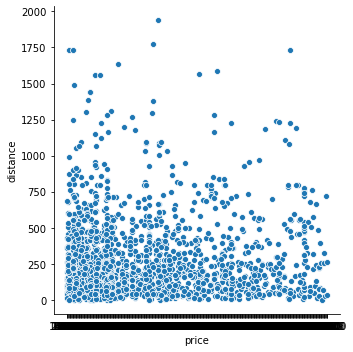

In [6]:
# Create a visualization
sns.relplot(
    data=df[df["property_type"] == "Entire apartment"][df["distance"] < 2000], x="price", y="distance"
)

In [41]:
Y = df[df["property_type"] == "Entire apartment"][df["distance"] < 1500].loc[:, "distance"].values.reshape(-1, 1)  # values converts it into a numpy array
X = df[df["property_type"] == "Entire apartment"][df["distance"] < 1500].loc[:, "price"].values .reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

<ipython-input-41-59191a2991a0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Y = df[df["property_type"] == "Entire apartment"][df["distance"] < 1500].loc[:, "distance"].values.reshape(-1, 1)  # values converts it into a numpy array
<ipython-input-41-59191a2991a0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = df[df["property_type"] == "Entire apartment"][df["distance"] < 1500].loc[:, "price"].values .reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column


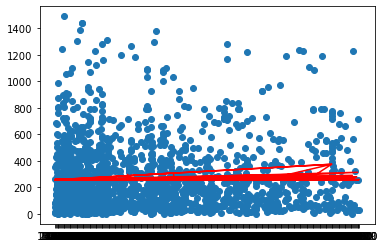

In [42]:
plt.scatter(X.ravel().tolist(),Y)
plt.plot(X.ravel().tolist(), Y_pred, color='red')
plt.show()


In [43]:
# The coefficients
print('Coefficients: \n', linear_regressor.coef_)

Coefficients: 
 [[0.01176267]]


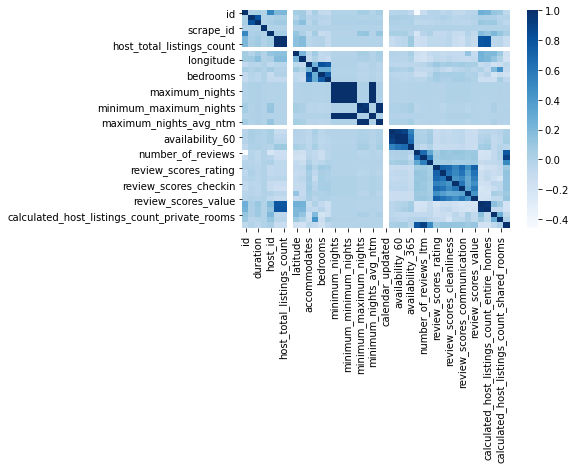

In [44]:
corr = df.corr()

# Draw heatmap
sns.heatmap(corr, cmap="Blues")

plt.show()

In [49]:
corr

,id,distance,duration,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,1.000000e+00,2.157428e-02,3.629922e-02,6.115439e-14,5.185971e-01,2.051713e-01,2.051713e-01,NaN,6.378791e-02,6.973206e-02,...,-2.559283e-02,-6.629138e-02,-7.905669e-02,-2.679641e-02,-2.087194e-02,0.264910,2.339819e-01,1.180065e-01,9.116136e-02,-5.916776e-02
distance,2.157428e-02,1.000000e+00,8.080195e-01,1.796784e-16,8.836149e-03,3.457546e-02,3.457546e-02,NaN,-1.595605e-02,7.373753e-02,...,-6.065346e-03,-3.205291e-02,-2.283283e-02,-2.145992e-02,2.257584e-03,0.026510,2.486357e-02,2.020349e-02,-2.149813e-02,-1.493284e-02
duration,3.629922e-02,8.080195e-01,1.000000e+00,2.649020e-15,3.386351e-02,7.741611e-02,7.741611e-02,NaN,7.472434e-02,1.611597e-01,...,-2.565889e-02,-4.051617e-02,-4.405248e-02,-4.828518e-02,-1.617842e-02,0.110326,9.144408e-02,9.951790e-02,-5.732930e-03,-5.025452e-02
scrape_id,6.115439e-14,1.796784e-16,2.649020e-15,1.000000e+00,-4.837474e-14,3.211530e-15,3.211530e-15,NaN,2.943902e-13,9.480278e-12,...,-1.860347e-16,-1.948393e-15,2.442903e-15,2.793077e-15,2.000347e-15,0.000000,-1.778215e-14,1.255005e-14,-8.633728e-15,-1.213823e-15
host_id,5.185971e-01,8.836149e-03,3.386351e-02,-4.837474e-14,1.000000e+00,5.166665e-02,5.166665e-02,NaN,1.215680e-01,2.001942e-02,...,-4.824313e-02,-9.931426e-02,-1.097775e-01,-4.896644e-03,-6.991890e-02,0.179988,1.251435e-01,2.032239e-01,1.180288e-01,3.566214e-02
host_listings_count,2.051713e-01,3.457546e-02,7.741611e-02,3.211530e-15,5.166665e-02,1.000000e+00,1.000000e+00,NaN,1.455059e-01,1.762767e-01,...,-4.256569e-02,-1.154334e-01,-1.435844e-01,-4.723379e-02,-9.766175e-02,0.783071,8.015711e-01,-4.546199e-02,-2.661684e-02,-1.146444e-01
host_total_listings_count,2.051713e-01,3.457546e-02,7.741611e-02,3.211530e-15,5.166665e-02,1.000000e+00,1.000000e+00,NaN,1.455059e-01,1.762767e-01,...,-4.256569e-02,-1.154334e-01,-1.435844e-01,-4.723379e-02,-9.766175e-02,0.783071,8.015711e-01,-4.546199e-02,-2.661684e-02,-1.146444e-01
neighbourhood_group_cleansed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,6.378791e-02,-1.595605e-02,7.472434e-02,2.943902e-13,1.215680e-01,1.455059e-01,1.455059e-01,NaN,1.000000e+00,2.168872e-01,...,-7.516469e-02,-8.396795e-02,-8.696559e-02,1.266553e-01,-8.910163e-02,0.252622,2.020193e-01,2.015410e-01,9.850323e-02,-1.666149e-01
longitude,6.973206e-02,7.373753e-02,1.611597e-01,9.480278e-12,2.001942e-02,1.762767e-01,1.762767e-01,NaN,2.168872e-01,1.000000e+00,...,-4.498792e-02,-7.951788e-02,-8.487444e-02,-9.369882e-02,-6.952679e-02,0.237987,2.109910e-01,1.253063e-01,8.123295e-03,-1.876807e-01


In [55]:
df1 = df[['price', 'distance', 'duration']]
df1['price'] = df1['price'].astype(float)

<ipython-input-55-0d2da52d6b8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price'] = df1['price'].astype(float)


In [56]:
df1.corr()


,price,distance,duration
price,1.000000,0.003182,0.013225
distance,0.003182,1.000000,0.808019
duration,0.013225,0.808019,1.000000


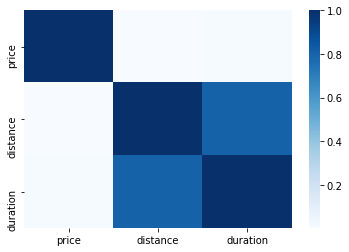

In [57]:
# Draw heatmap
sns.heatmap(df1.corr(), cmap="Blues")

plt.show()